the code is provided at [drivendata](http://blog.drivendata.org/2015/09/24/bees-benchmark/)

In [1]:
import os
from tqdm import tqdm # smart progress bar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.misc import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer


Using TensorFlow backend.


In [2]:
# list the contents of the data directory
!tree --filelimit=10 

.
├── bees
│   ├── images
│   │   ├── test [992 entries exceeds filelimit, not opening dir]
│   │   └── train [3969 entries exceeds filelimit, not opening dir]
│   ├── SubmissionFormat.csv
│   └── train_labels.csv
├── bees_benchmark_keras.ipynb
├── bees_benchmark_naive_bayes_classifer.ipynb
├── bees-dot-tar
├── bees_features.npy
├── bees.tar.gz
└── raw_hog_daisy_rbf.csv

4 directories, 8 files


In [3]:
# load the labels using pandas
labels = pd.read_csv("bees/train_labels.csv")

submission_format = pd.read_csv("bees/SubmissionFormat.csv",
                                index_col=0)

print( "Number of training examples is: ", labels.shape[0])
print( "Predictions should be type:", labels.dtypes[0])
labels.head()

Number of training examples is:  3969
Predictions should be type: int64


,id,genus
0,520,1.0
1,3800,1.0
2,3289,1.0
3,2695,1.0
4,4922,1.0


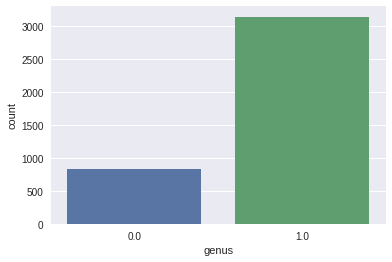

In [4]:
ax = sns.countplot(x="genus", data=labels)

In [5]:
# let's see what's in one of the image folders
!ls bees/images/train/ | head -n 10

1000.jpg
1002.jpg
1003.jpg
1004.jpg
1007.jpg
1008.jpg
1009.jpg
100.jpg
1010.jpg
1011.jpg
ls: erreur d'écriture: Relais brisé (pipe)


In [6]:
from scipy.misc import imread

temp = []

x = os.listdir("./bees/images/train/")
for number in range(3969):
    
        number = number + 1
        image_path = os.path.join("./bees/images/train/", str(number) + ".jpg")
        try: 
            img = imread(image_path, flatten=True)
        except: 
            image_path = os.path.join("./bees/images/test/", str(number) + ".jpg")
            img = imread(image_path, flatten=True)
        img = img.astype('float32')
        temp.append(img)
    
train_x = np.stack(temp)
train_x /= 255.0
train_x = train_x.reshape(-1, 40000).astype('float32')

In [7]:
labels.sort_values(by='id',inplace =True)

In [8]:
labels_ = keras.utils.to_categorical(labels.genus.values, 2)

In [9]:
from sklearn.cross_validation import train_test_split

# split into a local train/test set
X_train, X_test, y_train, y_test = train_test_split(train_x,
                                                    labels_,
                                                    test_size=0.5,
                                                    random_state=101)

/home/louis/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:


# define vars
input_num_units = 40000
hidden_num_units = 500
output_num_units = 2
epochs = 10
batch_size = 128

model = Sequential([
 Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),

 Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

/home/louis/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=40000, activation="relu", units=500)`
/home/louis/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="softmax", units=2)`


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_500 = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10
1984/1984 [==============================] - 2s - loss: 3.1493 - acc: 0.7671      

In [12]:
# define vars
input_num_units = 40000
hidden1_num_units = 1000
hidden2_num_units = 500
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 2

epochs = 10
batch_size = 128


model = Sequential([
 Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.2),
 Dense(units=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.2),
 Dense(units=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.2),
 Dense(units=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.2),
 Dense(units=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.2),

Dense(units=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
])

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d_with_drop_more_epochs = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10
1984/1984 [==============================] - 2s - loss: 3.3759 - acc: 0.6986      